___    
    
**Название проекта**
<big> Формирование модели монетизации игры "Космические братья" с помощью рекламы </big>
_____
**Описание исследования.**
Основной датасет содержит данные о событиях, совершенных в мобильной игре «Космические братья». В ней пользователи строят свою космическую программу и пытаются преуспеть в нелёгком деле колонизации галактики.

Основная монетизация игры — только планируется. Но предполагается, что в приложении будет происходить показ рекламы на экране с выбором типа объекта для постройки.

В датасете представлены данные по игре пользователей на первом уровне. Завершение первого уровня требует от игрока выполнения одного из двух условий:

- Победа над первым врагом
- Реализация проекта - разработка орбитальной сборки спутников

В датасете содержатся данные первых пользователей приложения — когорты пользователей, которые начали пользоваться приложением в период с 4 по 10 мая включительно.

_____
**Цель исследования.**
Проанализировать датасет и дать рекомендации о выборе модели монетизации

Предполагаемая модель монетизации:
* при строительстве каждого здания появляется окно с рекламой. Мы зарабатываем около 0.07 цента за каждый показ

    
_____
**Задачи исследования.**
- Подготовить данные для исследования (выгрузка)
- Провести предобработку данных
- Провести исседовательский анализ данных
- Проверить гипоетезы
- Дать рекомендации на основе исследования и сделать выводы
_____
**Исходные данные.**
Таблица game_actions.csv(данные о пользователей):

* event_datetime — время события;
* event — одно из трёх событий:
    1. `building` — объект построен,
    2. `finished_stage_1` — первый уровень завершён,
    3. `project` — проект завершён;
* building_type — один из трёх типов здания:
    1. `assembly_shop` — сборочный цех,
    2. `spaceport` — космопорт,
    3. `research_center` — исследовательский центр;
* user_id — идентификатор пользователя;
* project_type — тип реализованного проекта;

Таблица ad_cost.csv (информация о кликах на объявление):

* day - день, в который был совершен клик по объявлению
* source - источник трафика
* cost - стоимость кликов

Таблица user_source.csv (информация о источниках трафика, откуда пришли пользователи):
* user_id - идентификатор пользователя;
* source - источников, с которого пришёл пользователь, установивший приложение
_____
**Данное исследование разделим на несколько частей.**

***Часть 1. Выгрузка данных:***
* [1. Загрзука необходимых библиотек для анализа](#1-bullet)
* [2. Загрузка датасетов в проект](#2-bullet)
* [3. Первичные выводы (по необработанном датасету)](#3-bullet)

***Часть 2 Предобработка данных :***
* [1. Обработка пропусков](#4-bullet)
* [2. Поиск и анализ дубликатов](#5-bullet)
* [3. Корректировка типа данных](#6-bullet)
* [4. Выводы по второй части](#7-bullet)

***Часть 3.Исследовательский анализ данных :***
* [1. Анализ таблицы action](#8-bullet)
    * [1. action.date](#9-bullet)
    * [2. action.event](#10-bullet)
* [2. Анализ таблицы ad ](#11-bullet)
    * [1. ad.source](#12-bullet)
    * [2. ad.day](#13-bullet)
    * [3. ad.cost](#14-bullet)
* [3. Анализ таблицы source](#15-bullet)
    * [1. source.source](#16-bullet)
* [4. Вывод по певрой части ИАД](#17-bullet)
* [5. Анализ времени прохождения уровня ](#18-bullet)
* [6. Анализ количества зданий, построенных  пользователями](#19-bullet)
    * [1.Количество зданий для тех, кто выполнил проект](#20-bullet)
    * [2. Количество зданий для тех, кто прошел уровней с помощью победы над врагом](#21-bullet)
    * [3. Те, кто не закончили первый уровень](#22-bullet)
* [7.  Анализ количества визитов в день для уникального пользователя](#23-bullet)
* [8. Подключение монетизации](#24-bullet)
* [9. Общий вывод](#25-bullet)

***Часть 4.Расчет метрик :***
* [1. Расчет DAU/WAU/Sticky factor](#26-bullet)
* [2. Расчет СAC](#27-bullet)
* [3. Расчет Retention Rate](#28-bullet)
* [4. Расчет LTV](#29-bullet)
* [5. Общий вывод ](#30-bullet)

***Часть 5.Тестирование гипотез:***
* [1.Гипотеза о различие среднего времени прохождения уровня между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над первым врагом](#31-bullet)
* [2. Гипотеза о различия среднего  количества зданий, построенных у пользователей, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над первым врагом](#32-bullet)
* [3. Общие выводы по части ](#33-bullet)


***Часть 6.Выводы и прдложения:***
* [1. Общие выводы по проекту](#34-bullet)
* [2. Рекомендации для модели монетизации игры](#35-bullet)

<a href="https://public.tableau.com/app/profile/nirson5/viz/Cosmic_bros/Dashboard1?publish=yes">Ссылка на Дешборд </a>

<a href="https://yadi.sk/i/7quJMKpWCgpMtg">Ссылка на Презентацию </a>

## Загрузка данных и библиотек

<a class="anchor" id="1-bullet"></a>
### Загрзука необходимых библиотек для анализа

Перед началом работы с данными, выгрузим все библиотеки, которые нам могут понадобиться для данного анализа

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns
from scipy import stats as st

<a class="anchor" id="2-bullet"></a>
### Загрузка датасетов в проект

Для того, чтобы было удобнее работать с файлами, загрузим их на гугл диск и прочтем с помощью pandas. Всего у нас три датасета, которые нужно детально проанализировать:
* game_actions.csv
* ad_costs.csv
* user_source.csv

После загрузки выведем размер датасетов, информацию о них, а также первые пять строк.

In [2]:
action= pd.read_csv('//datasets//game_actions.csv')

In [3]:
action.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   event_datetime  135640 non-null  object
 1   event           135640 non-null  object
 2   building_type   127957 non-null  object
 3   user_id         135640 non-null  object
 4   project_type    1866 non-null    object
dtypes: object(5)
memory usage: 5.2+ MB


In [4]:
action.shape

(135640, 5)

In [5]:
action.head()

,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN


Первично о датасете  game_actions.csv можно сделать вывод, что:
* некоторые форматы данных указаны некорректно
* есть пропуски


In [6]:
ad= pd.read_csv('//datasets//ad_costs.csv')

In [7]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   source  28 non-null     object 
 1   day     28 non-null     object 
 2   cost    28 non-null     float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes


In [8]:
ad.shape

(28, 3)

In [9]:
ad.head()

,source,day,cost
0,facebook_ads,2020-05-03,935.882786
1,facebook_ads,2020-05-04,548.354480
2,facebook_ads,2020-05-05,260.185754
3,facebook_ads,2020-05-06,177.982200
4,facebook_ads,2020-05-07,111.766796


В таблице затрат на рекламу нет пропусков, но формат даты указан некорректно.

Теперь выгрузим последнюю необходимую для исследования таблицу

In [10]:
source= pd.read_csv('//datasets//user_source.csv')
    

In [11]:
source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  13576 non-null  object
 1   source   13576 non-null  object
dtypes: object(2)
memory usage: 212.2+ KB


In [12]:
source.shape

(13576, 2)

In [13]:
source.head()

,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads


<a class="anchor" id="3-bullet"></a>
### Первичные выводы

В данном пункте было сделано следующее:
* выгружены необходимые библиотеки
* загружены необходимые датасеты
* определены зоны для дальнейшего анализа

Теперь передем на этап предобработки данных

## Предобработка данных

В данном пункте мы преобразуем данные, чтобы провести последующие пункты анализа. 

Сначала обработаем пропуски.

<a class="anchor" id="4-bullet"></a>
### Обработка пропусков

Из предыдущего пункта мы узнали, что пропуски содержаться у нас только в таблице action. Будем работать с ней

In [14]:
action.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   event_datetime  135640 non-null  object
 1   event           135640 non-null  object
 2   building_type   127957 non-null  object
 3   user_id         135640 non-null  object
 4   project_type    1866 non-null    object
dtypes: object(5)
memory usage: 5.2+ MB


Посчитаем точное количество пропусков в каждом столбце

In [15]:
action.isnull().sum()

event_datetime         0
event                  0
building_type       7683
user_id                0
project_type      133774
dtype: int64

Видим, что пропуски есть в переменной building_type и project_type. Посмотрим уникальные значения каждой переменной.

In [16]:
action.building_type.unique()

array(['assembly_shop', 'spaceport', nan, 'research_center'], dtype=object)

In [17]:
action.building_type.value_counts()

spaceport          59325
assembly_shop      54494
research_center    14138
Name: building_type, dtype: int64

С точки зрения знаний, можно предположить, что исходя из логики игры, некоторые пользователи просто решили не строить здания, а завершить игру. 
Проверим гипотезу - отфильтруем только по тем пользователям, кто либо выполнил проект или завершил игру - по идеи, в это время они не могли ничего строить.

Для удобства анализа заменим nan на число 9999

In [18]:
action['building_type']=action['building_type'].replace(np.nan, 9999)
action_query=action.query('building_type==9999 & (event!="building")')

In [19]:
action_query.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7683 entries, 6659 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   event_datetime  7683 non-null   object
 1   event           7683 non-null   object
 2   building_type   7683 non-null   object
 3   user_id         7683 non-null   object
 4   project_type    1866 non-null   object
dtypes: object(5)
memory usage: 360.1+ KB


Смело заменим 9999 на "отсутствие зданий" - значит на этом этапе здание не строилось.

In [20]:
action['building_type']=action['building_type'].replace(9999, 'no_building')

In [21]:
action.info() #пропусков в данном столбце нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   event_datetime  135640 non-null  object
 1   event           135640 non-null  object
 2   building_type   135640 non-null  object
 3   user_id         135640 non-null  object
 4   project_type    1866 non-null    object
dtypes: object(5)
memory usage: 5.2+ MB


Теперь проверим следующий столбец с пропусками project_type.

Выведем уникальные значения

In [22]:
action.project_type.unique()

array([nan, 'satellite_orbital_assembly'], dtype=object)

Видим всего два признака:
* nan 
* законечно строительства спунтика.

Проврим, совпадает ли количество заполненных значений со столбцом event и типом события project.

In [23]:
action.loc[action['event']=='project'].count()

event_datetime    1866
event             1866
building_type     1866
user_id           1866
project_type      1866
dtype: int64

Значения совпадают. 

Скорее всего в данном столбце отображется только целевое действие "закончить проект". Для того чтобы избежать пропусков, которые могут мешать в обработке данных, заменим их на not_project,  а также создадим дополнительный столбец, который позволит разнести пользователей по трем группам по типу окончания  1 уровня:
* кто закончил его завершением проекта
* кто закончил его победой над врагом
* кто не закончил первый уровень

Сначала заполним пропуски. Заменин np.nan на dummy значение 9999

In [24]:
action['project_type']=action['project_type'].replace(np.nan, 9999)

Теперь с помощью метода np.where заменим часть пропусков в столбце project_type на not_project

In [25]:
action['project_type'] = np.where((action['project_type'] == 9999),  
                                        "not_project", action['project_type'])

In [26]:
action['project_type'].value_counts()

not_project                   133774
satellite_orbital_assembly      1866
Name: project_type, dtype: int64

Пропуски заполнили.

Теперь распределим всех юзеров в дополнительный столбец, в которых мы укажем как они заверши первый уровень

In [27]:
user_filter_project=action[action['event'] == 'project']['user_id'] #отфильтруем по project user_id

In [28]:
action['finishing_type']=np.where(action['user_id'].isin (user_filter_project),
                                        "win_by_project", 'not_finished')  #создадим столбец где заполним значения

In [29]:
action['finishing_type'].value_counts()

not_finished      108307
win_by_project     27333
Name: finishing_type, dtype: int64

In [30]:
user_filter_win=action[(action['event'] == 'finished_stage_1') & (action['project_type']!='satellite_orbital_assembly')]['user_id']

In [31]:
user_filter_win_pr =action.query('event=="building" & (user_id in @user_filter_win &  user_id not in @user_filter_project)')

In [32]:
action['finishing_type']=np.where(action['user_id'].isin(user_filter_win_pr['user_id']),
                                        "win_by_battle", action['finishing_type'])

In [33]:
action['finishing_type'].value_counts()

not_finished      67171
win_by_battle     41136
win_by_project    27333
Name: finishing_type, dtype: int64

Получили дополнительный столбец, который пригодится для анализа

Пропуски обработаны, теперь перидем к поиску дубликатов

<a class="anchor" id="5-bullet"></a>
### Поиск и анализ дубликатов

Проверим все таблица на полные дубликаты

In [34]:
action.duplicated().sum()

1

In [35]:
ad.duplicated().sum()

0

In [36]:
source.duplicated().sum()

0

Удалим явный дубликат в датафрейме action

In [37]:
action=action.drop_duplicates()

In [38]:
action.duplicated().sum()

0

Дубликатов больше нет. Теперь переведем все колонки в нужный формат

<a class="anchor" id="6-bullet"></a>
### Корректировка типа данных

Повторно вызовем все датасеты, чтобы проверить, где тип данных указан не верно

In [39]:
action.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135639 entries, 0 to 135639
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   event_datetime  135639 non-null  object
 1   event           135639 non-null  object
 2   building_type   135639 non-null  object
 3   user_id         135639 non-null  object
 4   project_type    135639 non-null  object
 5   finishing_type  135639 non-null  object
dtypes: object(6)
memory usage: 7.2+ MB


In [40]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   source  28 non-null     object 
 1   day     28 non-null     object 
 2   cost    28 non-null     float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes


In [41]:
source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  13576 non-null  object
 1   source   13576 non-null  object
dtypes: object(2)
memory usage: 212.2+ KB


Видим, что на данном этапе нужно изменить столбцы day и  event_datetime и привести их в формат даты и времени.
Также добавим признак недели (пригодится для расчета метрик) и дату без времени для дальнейших группировок

In [42]:
pd.options.mode.chained_assignment = None 
action['event_datetime']=pd.to_datetime(action['event_datetime'], format='%Y-%m-%dT%H:%M:%S')
action['date']  = action['event_datetime'].dt.date
action['week'] =action['event_datetime'].dt.isocalendar().week

In [43]:
action.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135639 entries, 0 to 135639
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   event_datetime  135639 non-null  datetime64[ns]
 1   event           135639 non-null  object        
 2   building_type   135639 non-null  object        
 3   user_id         135639 non-null  object        
 4   project_type    135639 non-null  object        
 5   finishing_type  135639 non-null  object        
 6   date            135639 non-null  object        
 7   week            135639 non-null  UInt32        
dtypes: UInt32(1), datetime64[ns](1), object(6)
memory usage: 8.9+ MB


In [44]:
# приводим колонку day к типу даннух date
ad['day'] = pd.to_datetime(ad['day'])

In [45]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   source  28 non-null     object        
 1   day     28 non-null     datetime64[ns]
 2   cost    28 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 800.0+ bytes


Изменение произошл

Теперь данные готовы для анализа

<a class="anchor" id="7-bullet"></a>
### Выводы по второй части

В данном пункте мы сделали следующее:
* проверили данные на пропуски и заменили их
* удалили дубликаты
* изменили формат данных на корректны1 и добавили дополнительные столбцы

Теперь проведем исследовательский анализ данных

## Исследовательский анализ данных

Разделим анализ данных на две части - в первой проанализируем каждый признак датасета, а после посчитаем значения некоторых признаков, таких как среднее количество зданий и время прохождение уровня.

Начнем с анализа таблицы action

<a class="anchor" id="8-bullet"></a>
### Анализ таблицы action 

<a class="anchor" id="9-bullet"></a>
#### action.date

In [46]:
action['date'].value_counts()

2020-05-10    15207
2020-05-09    13129
2020-05-08    12059
2020-05-07    10858
2020-05-06     9925
2020-05-05     9055
2020-05-11     8185
2020-05-04     8171
2020-05-12     7918
2020-05-13     7624
2020-05-14     6830
2020-05-15     5952
2020-05-16     5099
2020-05-17     3955
2020-05-18     2847
2020-05-19     2319
2020-05-20     1837
2020-05-21     1370
2020-05-22      946
2020-05-23      707
2020-05-24      491
2020-05-25      382
2020-05-26      262
2020-05-27      180
2020-05-28      118
2020-05-29       79
2020-05-30       44
2020-05-31       29
2020-06-01       20
2020-06-02       15
2020-06-03       11
2020-06-04       10
2020-06-05        5
Name: date, dtype: int64

In [47]:
action['date'].nunique()

33

Видим, что всего в нашей выборки наблюдения за 33 дня

In [48]:
action['date'].max()

datetime.date(2020, 6, 5)

In [49]:
action['date'].min()

datetime.date(2020, 5, 4)

Видим, что в датасете представлены данные за 33 дня:
* самая первая дата - 04-05-2020
* самая последняя - 05-06-2020

Визуализируем данные с помощью столбачатой диаграмы

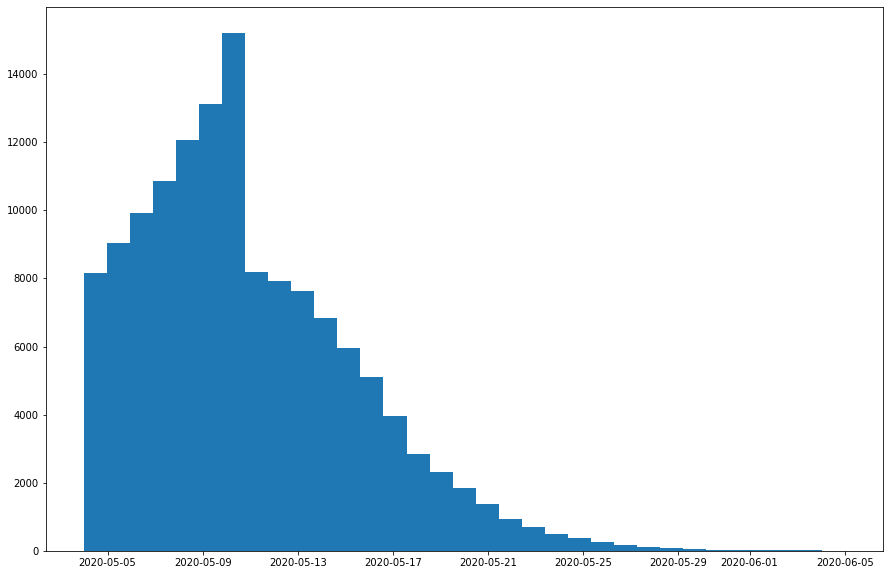

In [50]:
plt.figure(figsize=(15,10))
plt.hist(action['date'],bins=33)

plt.show()

Видим, что количество пользователей, которые использовали игру в определенные даты имеет распределение, похожее на Пуассона- все меньше людей сейчас активно играют в нашу игру.
Пик пришелся на 10.05.2020

Теперь рассмотрим параметр event

<a class="anchor" id="10-bullet"></a>
#### action.event

In [51]:
action['event'].value_counts()

building            127956
finished_stage_1      5817
project               1866
Name: event, dtype: int64

Теперь проверим сколько уникальных пользователей приходится на каждое событие

In [52]:
act_uni=action.groupby('event').agg({'user_id':'nunique'}).reset_index()
act_uni

,event,user_id
0,building,13576
1,finished_stage_1,5817
2,project,1866


Посчитаем, сколько уникальных пользователей в процентах от всего количества, завершило первый уровень

In [53]:
fin1=(act_uni.iloc[1,1]/act_uni.iloc[0,1])*100

In [54]:
print('Процент пользователей, закончившие превый уровень, от всех', fin1)

Процент пользователей, закончившие превый уровень, от всех 42.847672362993514


43% уникальных пользователей закончили первый уровень (то есть выполнили целевое действие), что является весьма неплохим показателем.
Визуализируем с помощью графика количество уникальных пользователей по типу события

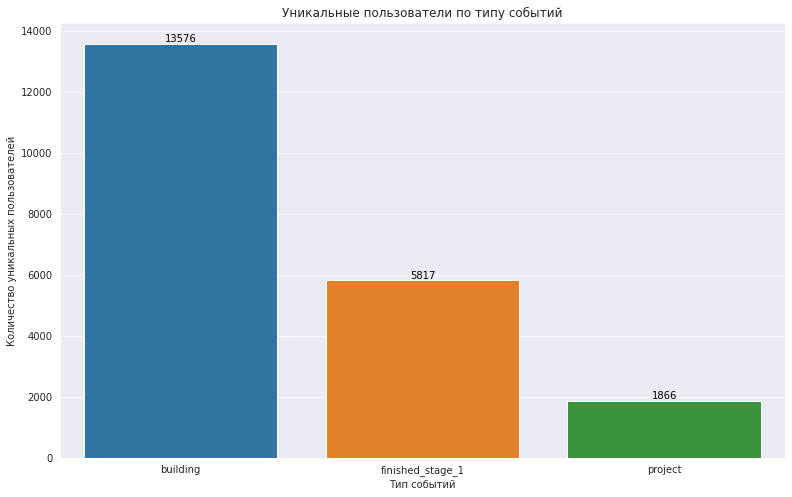

In [55]:
sns.set_style('darkgrid')

p=sns.barplot(x = 'event', y = "user_id", data = act_uni)
p.set_title("Уникальные пользователи по типу событий")
p.set_xlabel("Тип событий", fontsize = 10)
p.set_ylabel("Количество уникальных пользователей", fontsize = 10)
plt.gcf().set_size_inches(13, 8)
for i in p.patches:
             p.annotate("%.0f" % i.get_height(), (i.get_x() + i.get_width() / 2., i.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

plt.show()

В резульате анализа, данные распределились так:
- больше всего уникальных пользователей совершили строительство
- 5817 завершило первый уровень (около 43% от всех пользователей), из которых 1866 завершили с помощью проекта
- следовательно, пользователи, которые закончили первый уровень с помощью победы над врагом - 3951
- Можем сказать, что метод прохождения первого уровня с помощью победы над первым врагом куда популярнее, чем выполнение проекта.
    
Оставшиеся колонки датафрейма action рассматривать не будем - тип проекта мы уже проверили и заполнили на предыдущем шаге, а user_id особой информации нам не даст.

Переходим к датафрейму ad

<a class="anchor" id="11-bullet"></a>
### Датафрейм ad

<a class="anchor" id="12-bullet"></a>
#### ad.source

In [56]:
ad['source'].value_counts()

instagram_new_adverts      7
yandex_direct              7
facebook_ads               7
youtube_channel_reklama    7
Name: source, dtype: int64

Видим, что у нас есть 4 источника трафика, каждый из которых был использован на протяжении 7 дней. Пропусков в столбце нет

<a class="anchor" id="13-bullet"></a>
####  ad.day

In [57]:
ad['day'].value_counts()

2020-05-05    4
2020-05-09    4
2020-05-06    4
2020-05-03    4
2020-05-07    4
2020-05-04    4
2020-05-08    4
Name: day, dtype: int64

Видим, что в датафрейме представлены данные с 03.05.2020 по 09.05.2020.

Каждый источник трафика использовался в каждый из этих дней (пропусков нет)

<a class="anchor" id="14-bullet"></a>
#### ad.cost

В данном столбце содержаться данные о том сколько было потрачено на каждый канал. Вызовем метод describe,  а потом вызовем дополнительные столбцы таблицы, чтобы погрузиться в более детальную аналитику

In [58]:
ad.cost.describe()

count     28.000000
mean     271.556321
std      286.867650
min       23.314669
25%       66.747365
50%      160.056443
75%      349.034473
max      969.139394
Name: cost, dtype: float64

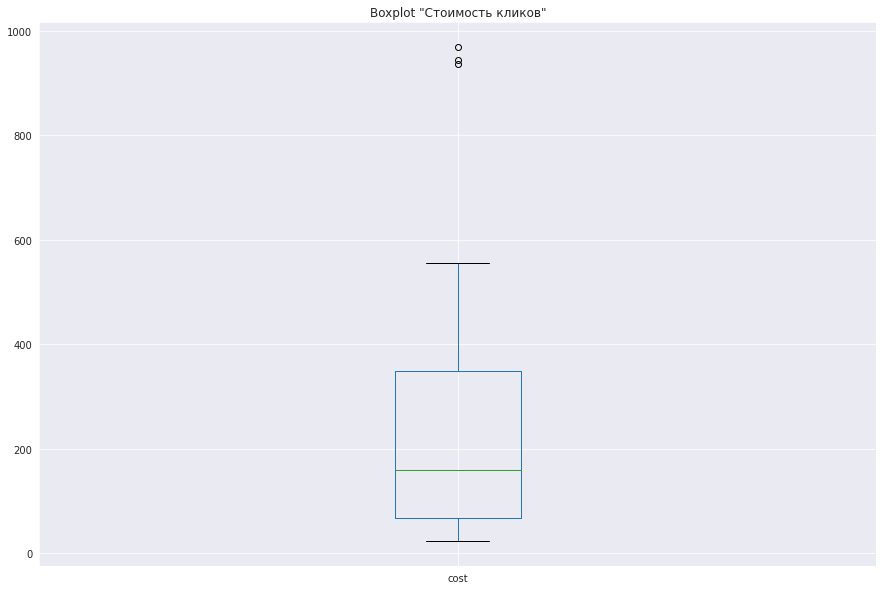

In [59]:
ad['cost'].plot.box( title='Boxplot "Стоимость кликов"', figsize=(15,10))

plt.show()

Можно сделать вывод, что:
*  в среднем на рекламу тратиться 271 у.е в день, медианное значение - 160 у.е. в день
*  самая большая трату на рекламу - 969 у.е., самая маленькая - 23.3 у.е.
* в выборке есть пара выбросов - в сторону увелечения, скорее всего в каком-то канале в какой-то день была очень дорогая реклама


Сгруппируем теперь по рекламным каналам и посчитаем сколько мы в сумме потратитли на них

In [60]:
ch_gr=ad.groupby('source')['cost'].agg('sum').reset_index().sort_values(by='cost',ascending=False)

In [61]:
ch_gr

,source,cost
2,yandex_direct,2233.111449
1,instagram_new_adverts,2161.441691
0,facebook_ads,2140.904643
3,youtube_channel_reklama,1068.119204


In [62]:
ch_gr['cost'].sum() #общие траты

7603.576986788023

Визуализируем с помощь графиков

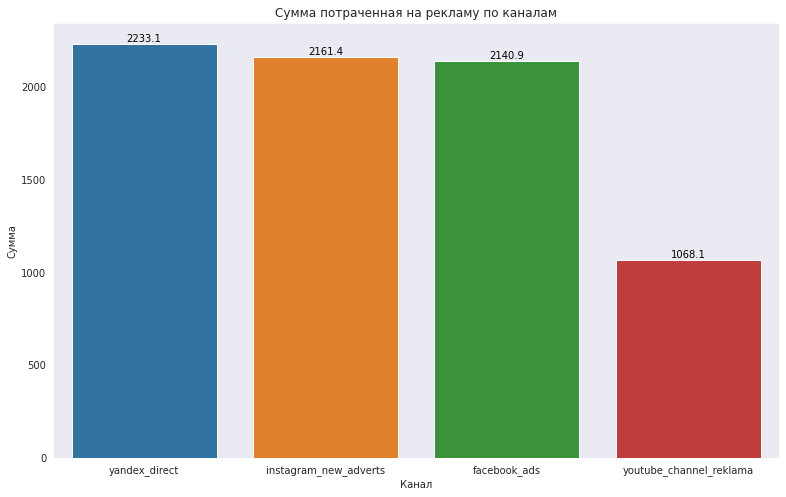

In [63]:
sns.set_style('dark')

p=sns.barplot(x = 'source', y = "cost", data = ch_gr)
p.set_title("Сумма потраченная на рекламу по каналам")
p.set_xlabel("Канал", fontsize = 10)
p.set_ylabel("Сумма", fontsize = 10)
plt.gcf().set_size_inches(13, 8)
for i in p.patches:
             p.annotate("%.1f" % i.get_height(), (i.get_x() + i.get_width() / 2., i.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

plt.show()

Из данной диаграмы видим, что больше всего мы потратили за неделю на каналы (в порядке убывания):
* yandex_direct - 2233.1 у.е
* instagram_new_adverts - 2161.4 у.е
* facebook_ads - 2140.9 у.е
* youtube_channel_reklama - 1068.1 у.е

Теперь передем к датафрейму source

<a class="anchor" id="12-bullet"></a>
### Датафрейм source

Вызовем повторно info, чтобы посмотреть какие столбцы нужно проанализировать

In [64]:
source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  13576 non-null  object
 1   source   13576 non-null  object
dtypes: object(2)
memory usage: 212.2+ KB


user_id в данной таблице анализировать не имеет смысла. Рассмотрим столбец source

<a class="anchor" id="16-bullet"></a>
#### source.source

In [65]:
source.source.value_counts()

yandex_direct              4817
instagram_new_adverts      3347
facebook_ads               2726
youtube_channel_reklama    2686
Name: source, dtype: int64

In [66]:
source_gr = source.groupby('source').agg({'user_id':'count'}).reset_index().sort_values(by = 'user_id', ascending = False)
source_gr.head()

,source,user_id
2,yandex_direct,4817
1,instagram_new_adverts,3347
0,facebook_ads,2726
3,youtube_channel_reklama,2686


Визуализируем теперь эти данные с помощью barchart

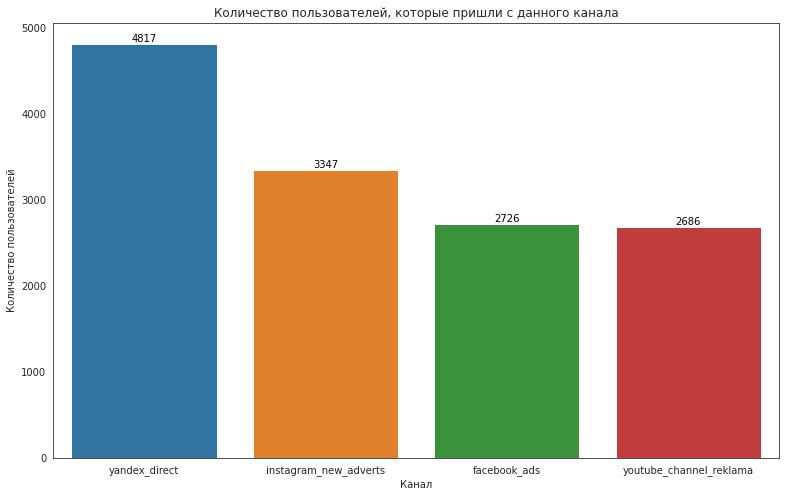

In [67]:
sns.set_style('white')

p=sns.barplot(x = 'source', y = "user_id", data = source_gr)
p.set_title("Количество пользователей, которые пришли с данного канала")
p.set_xlabel("Канал", fontsize = 10)
p.set_ylabel("Количество пользователей", fontsize = 10)
plt.gcf().set_size_inches(13, 8)
for i in p.patches:
             p.annotate("%.0f" % i.get_height(), (i.get_x() + i.get_width() / 2., i.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

plt.show()

Видим, что больше всего пользователей приходит к нам через следующие канала:
* yandex_direct - 4817
* instagram_new_aderts - 3347
* facebook_ads и youtube_channel_reklama дают приблизительно одинаковое количество - около 2700 пользователей

<a class="anchor" id="17-bullet"></a>
### Вывод по первой части третьего блока

В данной части было сделано следующее:
* проанализированы все данные по столбцам в датасетах
* были найдены минимальная (04-05-2020) и макисмальная (05-06-2020) даты начала наблюдения 
* определено, что процент пользователей, которые закончили первый уровень составляет около 42%, что является хорошим показателем
* у нас есть 4 рекламных источника, которые мы использовали каждый день для привлечения пользователя с 03.05.2020 по 08.05.2020
* больше всего мы потратили на продвижение с помощью yandex_direct, меньше всего - на рекламу на ютубе
* больше всего пользователей приходят к нам через yandex_direct,меньше всего - через рекламу фейсбук и ютуба.

Теперь посчитаем:
* время прохождение уровня
* количество построенных зданий
* количество визитов пользователей в день
* а также присоединим монетизацию (пригодится для анализа LTV)

### Вторая часть - Полноценный EDA

<a class="anchor" id="18-bullet"></a>
### Анализ времени прохождения уровня 

Посчитаем, сколько времени пользователи тратят на то, чтобы пройти 1 уровень. Для этого отберем user_id всех пользователей, которые этот уровень прошли, после этого сделаем по ним срез и сгруппируем найдя максимальное и минимальную дату.
Потом вызовем describe

In [68]:
user_filter =action[action['event'] == 'finished_stage_1']['user_id']

In [69]:
action_fin=action.query('user_id in @user_filter')

In [70]:
action_gb=action_fin.groupby('user_id').event_datetime.agg(['min', 'max']).reset_index()

In [71]:
action_gb['tot']=action_gb['max']-action_gb['min']

In [72]:
action_gb.head()

,user_id,min,max,tot
0,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-05 21:02:05,2020-05-12 07:40:47,6 days 10:38:42
1,003ee7e8-6356-4286-a715-62f22a18d2a1,2020-05-05 08:31:04,2020-05-17 21:47:49,12 days 13:16:45
2,004074f8-251a-4776-922c-8348dca1a2f6,2020-05-04 01:07:35,2020-05-16 19:57:40,12 days 18:50:05
3,00464e5e-28ed-4be6-bf44-517ef7b3937b,2020-05-04 08:35:29,2020-05-15 16:02:01,11 days 07:26:32
4,0056c007-c082-43cc-bdef-afc49bca4cb9,2020-05-10 11:49:47,2020-05-16 13:48:39,6 days 01:58:52


In [73]:
action_gb['tot'].describe()

count                          5817
mean     11 days 20:37:59.561801616
std       4 days 01:37:33.183162346
min                 0 days 09:39:01
25%                 9 days 05:13:21
50%                11 days 13:28:44
75%                14 days 05:15:16
max                30 days 21:58:53
Name: tot, dtype: object

В среднем, пользователии проводят на первом 11 дней и 20 часов 30 минут. Медианное значние также около 11 дней и 13 часов.

Быстрее всего уровень прошел пользователь за 09 часов 39 минут, самое большое время, проведенное на уровне 30 дней 21 час и 58 минут.

<a class="anchor" id="19-bullet"></a>
### Анализ количества зданий на пользователя

Для того , чтобы посчитать среднее количество зданий на пользователя, сгруппируем их по user_id, и посчитаем количество зданий.

После этого вызовем метод describe и опишем.

In [74]:
buildings_per_user = action.groupby('user_id').agg({'building_type': 'count'}).reset_index()


In [75]:
buildings_per_user.building_type.describe()

count    13576.000000
mean         9.991087
std          4.146133
min          1.000000
25%          6.000000
50%         10.000000
75%         13.000000
max         22.000000
Name: building_type, dtype: float64

Мы видим, что в среднем пользователей строит 10 зданий (медианное и среднее значение совпадают). Самое маленькое количество зданий в выборке 1, а самое большое 22 здания.

Мы также знаем, что у нас есть три группы пользователей:
* которые закончили 1 уровень с проектом
* которые закончили 1 уровень победой над врагом
* которые не закончили 1 уровень вообще.

Сделаем срез по каждому признаку и посчитаем количество для каждой группы

<a class="anchor" id="20-bullet"></a>
#### Количество зданий для тех, кто выполнил проект

In [76]:
user_filter_project_q =action.query('event=="building" & user_id in @user_filter_project')

In [77]:
user_filter_project_q.head()

,event_datetime,event,building_type,user_id,project_type,finishing_type,date,week
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,not_project,win_by_project,2020-05-04,19
8,2020-05-04 00:00:44,building,assembly_shop,65a92713-5969-48b1-8945-bfefa5063887,not_project,win_by_project,2020-05-04,19
9,2020-05-04 00:01:33,building,assembly_shop,fa352362-d258-472c-b295-2796ccc39fa3,not_project,win_by_project,2020-05-04,19
13,2020-05-04 00:02:56,building,assembly_shop,7b3b6554-7949-4065-9808-d6c79bdc2f58,not_project,win_by_project,2020-05-04,19
20,2020-05-04 00:03:46,building,assembly_shop,b374304d-2f74-4cc1-a4e2-500da44a06c7,not_project,win_by_project,2020-05-04,19


In [78]:
buildings_per_user_p = user_filter_project_q.groupby('user_id').agg({'building_type': 'count'}).reset_index()

In [79]:
buildings_per_user_p.describe()

,building_type
count,1866.000000
mean,12.647910
std,2.162522
min,10.000000
25%,11.000000
50%,12.000000
75%,14.000000
max,20.000000


Кто выбирает проект как способ оконачение первого уровня - строят 12,6 зданий в среднем
Теперь рассмотрим тех, кто заканчивает уровень победой над врагом

<a class="anchor" id="21-bullet"></a>
#### Количество зданий для тех, кто закончил уровень победой над врагом

In [80]:
buildings_per_user_pw = user_filter_win_pr.groupby('user_id').agg({'building_type': 'count'}).reset_index()

In [81]:
buildings_per_user_pw.describe()

,building_type
count,3951.000000
mean,9.411541
std,3.059529
min,2.000000
25%,8.000000
50%,10.000000
75%,12.000000
max,19.000000


Пользователи, которые заканчивают игру победой над врагом в среднем строят 9.4 здания

Теперь рассмотрим тех, кто не закончил уровень

<a class="anchor" id="22-bullet"></a>
#### Количество зданий для тех, кто не закончил уровень

In [82]:
user_filter_nf=action[(action['finishing_type'] == 'not_finished') ]['user_id']

In [83]:
user_filter_not_fin =action.query('event=="building" & (user_id in @user_filter_nf & user_id not in @user_filter_win & user_id not in @user_filter_project)')

In [84]:
buildings_per_user_nf = user_filter_not_fin.groupby('user_id').agg({'building_type': 'count'}).reset_index()

In [85]:
buildings_per_user_nf.describe()

,building_type
count,7759.000000
mean,8.657043
std,4.135660
min,1.000000
25%,5.000000
50%,8.000000
75%,12.000000
max,20.000000


В среднем, те кто не закончил уровень строят около 8.6 домов

Теперь посчитаем среднее количество визитов в игру пользователя в день

<a class="anchor" id="23-bullet"></a>
### Анализ количества визитов в день для уникального пользователя

Посчитаем, сколько в среднем наши пользователи заходят в игру

In [86]:
user_per_day=action.groupby('date')['user_id'].agg(['count','nunique']).reset_index()

In [87]:
user_per_day['ratio']=user_per_day['count']/user_per_day['nunique']

In [88]:
user_per_day['ratio'].mean()

1.3334837067723853

В среднем пользователь заходит в игру 1.33 раза в день

<a class="anchor" id="24-bullet"></a>
### Присоеденение монетизации

Коллеги сообщили, что за каждый просмотр рекламы мы зарабатываем около 0.07 у.е.
        Исходя из текущей модели, мы показываем рекламу, когда пользователь заходит в меню , чтобы построить здание
Создадим дополнительную переменную с условием, что если в столбце event =='building', значение столбца равно 0.07, а если нет - то 0.
Используем для этого np.where

In [89]:
action['rev'] = np.where((action['event'] =='building'), 
                                        0.07, 0)

In [90]:
action.head()  

,event_datetime,event,building_type,user_id,project_type,finishing_type,date,week,rev
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,not_project,not_finished,2020-05-04,19,0.07
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,not_project,win_by_project,2020-05-04,19,0.07
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,not_project,win_by_battle,2020-05-04,19,0.07
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,not_project,not_finished,2020-05-04,19,0.07
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,not_project,win_by_battle,2020-05-04,19,0.07


In [91]:
action['rev'].sum()

8956.920000000004

Вызовем еще раз затраты на рекламу и посчитаем, насколько процентов мы выходим в прибыль/не окупаемся

In [92]:
((action['rev'].sum()/ch_gr['cost'].sum())-1)*100

17.798767811038818

При текущих условиях мы заработаем почти 9 тысяч у.е., что больше чем наши суммарные затраты на рекламу почти на 18%

<a class="anchor" id="25-bullet"></a>
### Общий вывод

В данном пункте было сделано следующее:
* расчитано время, сколько пользователь проводит на 1 уровне - в среднем около 11 дней и 20 часов
* расчитано сколко зданий строят пользователи в среднем и в зависимости от их поведения в игре ( в среднем - 10 зданий)
* расчитано сколько в среднем пользователь в день заходит в игру - около 1.3 раза
* добавлена монетизация и вычеслено, что при текущих условиях мы могли бы заработать 9 т. у.е.

Передем к расчету метрик

## Расчет метрик

<a class="anchor" id="26-bullet"></a>
### Расчет MAU, WAU, Sticky Factor

Данные метрики позволяют узнать насколько вовлечен пользователь в нашу игру

In [93]:
dau_total = action.groupby('date').agg({'user_id': 'nunique'}).mean()

dau_total

user_id    2884.878788
dtype: float64

In [94]:
wau_total = (
    action.groupby(['week'])
    .agg({'user_id': 'nunique'})
    .mean()
)
wau_total 

user_id    6120.0
dtype: float64

In [95]:
print('Sticky factor равен ', "{:.2%}".format(float(dau_total / wau_total))) 

Sticky factor равен  47.14%


<big>Вывод</big>

На дневной основе в игру в среднем заходят 2884 пользовтаеля, на недельной - 6120

Sticky Factor равен 47.14%, что является высоким показателем.

Посчитаем теперь Customer Acquisition Costs

<a class="anchor" id="27-bullet"></a>
### Расчет CAC

In [96]:
ad_costs_source = pd.merge(source_gr, ch_gr, on = ['source'], how = 'inner').reset_index()
ad_costs_source.head() #cоедим стоимость канала и количество пользователей, которые с него пришли

,index,source,user_id,cost
0,0,yandex_direct,4817,2233.111449
1,1,instagram_new_adverts,3347,2161.441691
2,2,facebook_ads,2726,2140.904643
3,3,youtube_channel_reklama,2686,1068.119204


In [97]:
#разделим одно число на другое
ad_costs_source['cac']=ad_costs_source['cost']/ad_costs_source['user_id']

In [98]:
ad_costs_source=ad_costs_source.sort_values(by='cac',ascending=False)

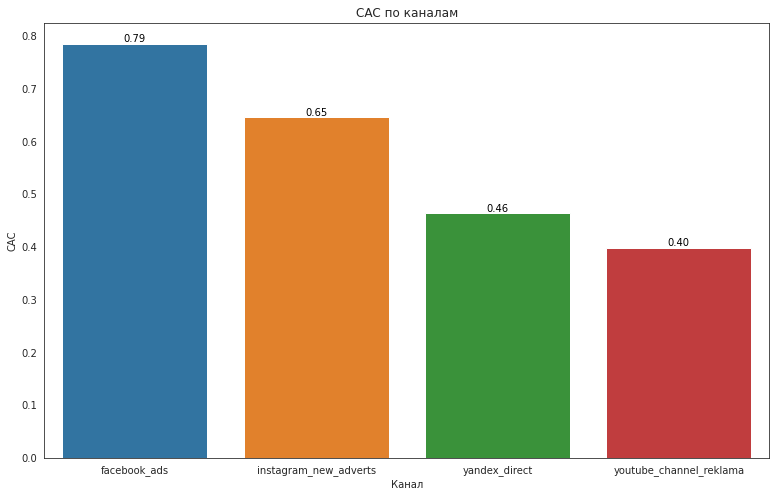

In [99]:
sns.set_style('white')

p=sns.barplot(x = 'source', y = "cac", data = ad_costs_source)
p.set_title("CAC по каналам")
p.set_xlabel("Канал", fontsize = 10)
p.set_ylabel("CAC", fontsize = 10)
plt.gcf().set_size_inches(13, 8)
for i in p.patches:
             p.annotate("%.2f" % i.get_height(), (i.get_x() + i.get_width() / 2., i.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

plt.show()

In [100]:
ad_costs_source['cac'].mean() #считаем среднюю стоимость

0.5731002471448883

Вывод по CAC:
* средняя стоимость CAC для всех 4 каналов - 0.57 у.е.
* самый "дорогой" канал facebook_ads (0.79 у.е.), самый "дешевый" youtube_channel_reklama (0.4 у.е.)
* Нужно дополнительно проанализироваь фейсбук - в чем причина такой стоимости, и есть ли смысл перераспределить бюджет

Теперь посчитаем коэффицент Удержания

<a class="anchor" id="28-bullet"></a>
### Расчет Retention Rate

Для каждого пользователя считаем первый заход в игру

In [101]:
min_date=action.groupby('user_id')['event_datetime'].min()

In [102]:
min_date.name='min_date' #переименовываем

In [103]:
result_raw = action.merge(
    min_date, on='user_id', how='left')

result_raw.head()

,event_datetime,event,building_type,user_id,project_type,finishing_type,date,week,rev,min_date
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,not_project,not_finished,2020-05-04,19,0.07,2020-05-04 00:00:01
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,not_project,win_by_project,2020-05-04,19,0.07,2020-05-04 00:00:03
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,not_project,win_by_battle,2020-05-04,19,0.07,2020-05-04 00:00:16
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,not_project,not_finished,2020-05-04,19,0.07,2020-05-04 00:00:16
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,not_project,win_by_battle,2020-05-04,19,0.07,2020-05-04 00:00:35


In [104]:
result_raw['min_date']=result_raw['min_date'].dt.date #переведем в дату

In [105]:
 #посчитаем лайфтайм для каждого пользователя
result_raw['lifetime'] = (
   result_raw['date'] - result_raw['min_date']
).dt.days
 #округлим
result_raw['lifetime'] = result_raw['lifetime'].round().astype('int')

In [106]:
result_raw.head()

,event_datetime,event,building_type,user_id,project_type,finishing_type,date,week,rev,min_date,lifetime
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,not_project,not_finished,2020-05-04,19,0.07,2020-05-04,0
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,not_project,win_by_project,2020-05-04,19,0.07,2020-05-04,0
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,not_project,win_by_battle,2020-05-04,19,0.07,2020-05-04,0
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,not_project,not_finished,2020-05-04,19,0.07,2020-05-04,0
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,not_project,win_by_battle,2020-05-04,19,0.07,2020-05-04,0


In [107]:
#создадим сводную по лайфтайму
result_grouped = result_raw.pivot_table(
    index=['min_date'], columns='lifetime', values='user_id', aggfunc='nunique'
)

result_grouped

lifetime,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
min_date,,,,,,,,,,,,,,,,,,,,,
2020-05-04,5860.0,3021.0,3204.0,3412.0,3564.0,3758.0,4161.0,2728.0,2504.0,2379.0,...,43.0,29.0,19.0,12.0,6.0,4.0,2.0,1.0,2.0,2.0
2020-05-05,3361.0,1803.0,1903.0,2058.0,2133.0,2312.0,1589.0,1516.0,1374.0,1280.0,...,23.0,16.0,9.0,8.0,3.0,2.0,1.0,NaN,NaN,NaN
2020-05-06,1847.0,960.0,1018.0,1118.0,1224.0,802.0,820.0,803.0,686.0,614.0,...,9.0,10.0,4.0,3.0,3.0,4.0,1.0,1.0,1.0,NaN
2020-05-07,1109.0,563.0,613.0,665.0,424.0,444.0,510.0,433.0,365.0,323.0,...,11.0,7.0,3.0,6.0,3.0,3.0,3.0,3.0,NaN,NaN
2020-05-08,688.0,332.0,375.0,242.0,262.0,285.0,303.0,259.0,180.0,215.0,...,3.0,5.0,1.0,NaN,2.0,1.0,NaN,NaN,NaN,NaN
2020-05-09,440.0,211.0,141.0,149.0,192.0,172.0,185.0,168.0,119.0,95.0,...,3.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-10,271.0,69.0,81.0,89.0,92.0,112.0,118.0,100.0,57.0,57.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
#расчитаем размер когорты
cohort_sizes = (
    result_raw.groupby('min_date')
    .agg({'user_id': 'nunique'})
    .rename(columns={'user_id': 'cohort_size'})
)

cohort_sizes

,cohort_size
min_date,
2020-05-04,5860
2020-05-05,3361
2020-05-06,1847
2020-05-07,1109
2020-05-08,688
2020-05-09,440
2020-05-10,271


In [109]:
#соединим два датафрейма по рамзеру когорты и пользователям
result_grouped = cohort_sizes.merge(
    result_grouped, on='min_date', how='left'
).fillna(0)

result_grouped

,cohort_size,0,1,2,3,4,5,6,7,8,...,22,23,24,25,26,27,28,29,30,31
min_date,,,,,,,,,,,,,,,,,,,,,
2020-05-04,5860,5860.0,3021.0,3204.0,3412.0,3564.0,3758.0,4161.0,2728.0,2504.0,...,43.0,29.0,19.0,12.0,6.0,4.0,2.0,1.0,2.0,2.0
2020-05-05,3361,3361.0,1803.0,1903.0,2058.0,2133.0,2312.0,1589.0,1516.0,1374.0,...,23.0,16.0,9.0,8.0,3.0,2.0,1.0,0.0,0.0,0.0
2020-05-06,1847,1847.0,960.0,1018.0,1118.0,1224.0,802.0,820.0,803.0,686.0,...,9.0,10.0,4.0,3.0,3.0,4.0,1.0,1.0,1.0,0.0
2020-05-07,1109,1109.0,563.0,613.0,665.0,424.0,444.0,510.0,433.0,365.0,...,11.0,7.0,3.0,6.0,3.0,3.0,3.0,3.0,0.0,0.0
2020-05-08,688,688.0,332.0,375.0,242.0,262.0,285.0,303.0,259.0,180.0,...,3.0,5.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0
2020-05-09,440,440.0,211.0,141.0,149.0,192.0,172.0,185.0,168.0,119.0,...,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-05-10,271,271.0,69.0,81.0,89.0,92.0,112.0,118.0,100.0,57.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [110]:
#посчитаем в процентах с помощью div
result_grouped = result_grouped.div(
    result_grouped['cohort_size'], axis=0
).drop(columns=['cohort_size'])

result_grouped

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
min_date,,,,,,,,,,,,,,,,,,,,,
2020-05-04,1.0,0.515529,0.546758,0.582253,0.608191,0.641297,0.710068,0.465529,0.427304,0.405973,...,0.007338,0.004949,0.003242,0.002048,0.001024,0.000683,0.000341,0.000171,0.000341,0.000341
2020-05-05,1.0,0.536447,0.566201,0.612318,0.634633,0.687891,0.472776,0.451056,0.408807,0.380839,...,0.006843,0.004760,0.002678,0.002380,0.000893,0.000595,0.000298,0.000000,0.000000,0.000000
2020-05-06,1.0,0.519762,0.551164,0.605306,0.662696,0.434218,0.443963,0.434759,0.371413,0.332431,...,0.004873,0.005414,0.002166,0.001624,0.001624,0.002166,0.000541,0.000541,0.000541,0.000000
2020-05-07,1.0,0.507665,0.552750,0.599639,0.382326,0.400361,0.459874,0.390442,0.329125,0.291253,...,0.009919,0.006312,0.002705,0.005410,0.002705,0.002705,0.002705,0.002705,0.000000,0.000000
2020-05-08,1.0,0.482558,0.545058,0.351744,0.380814,0.414244,0.440407,0.376453,0.261628,0.312500,...,0.004360,0.007267,0.001453,0.000000,0.002907,0.001453,0.000000,0.000000,0.000000,0.000000
2020-05-09,1.0,0.479545,0.320455,0.338636,0.436364,0.390909,0.420455,0.381818,0.270455,0.215909,...,0.006818,0.002273,0.002273,0.002273,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-05-10,1.0,0.254613,0.298893,0.328413,0.339483,0.413284,0.435424,0.369004,0.210332,0.210332,...,0.003690,0.003690,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


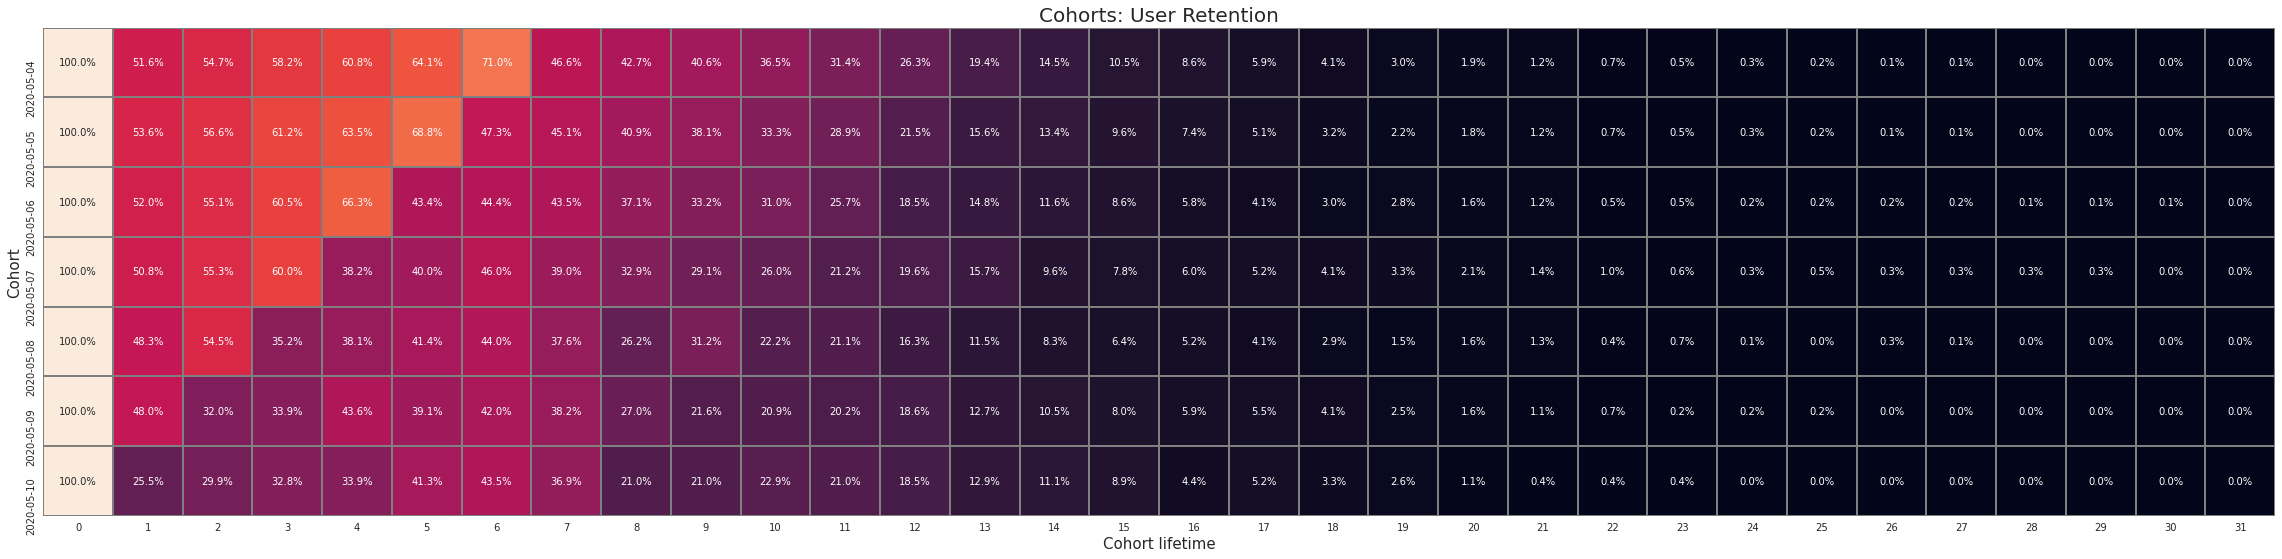

In [111]:
# выводим сводную таблицу ввиде тепловой карты
plt.figure(figsize=(40, 50))
plt.title('Cohorts: User Retention', size=20)
ax = sns.heatmap(result_grouped, annot=True, fmt='.1%', linewidths=1, linecolor='gray', cbar=0, square=True)
plt.xlabel('Cohort lifetime', size=15)
plt.ylabel('Cohort', size=15)
plt.show()

Выводы по показателю User Retention:
* Почти все когорты, кроме последней имеет удержание около 50% на первый день - это очень хороший показатель
* В течение недели мы можем наблюдать, что до 6ого дня показатель растет (но не более чем на 5%), а вот после 7ого резко идет на убыль
* В целом каждая следующая когорта имеет более низкие показатели, чем предыдущие. На 14-15 день показатели по всем когортам выравниваются и продолжают падение


Теперь посчитаем показтель LTV - сколько мы получаем с каждого пользователя, при условии, что с каждого построенного здания и показа рекламы мы получаем 0.07 у.е.

<a class="anchor" id="29-bullet"></a>
### Расчет LTV

In [112]:
action = pd.merge(action, source, on='user_id') #добавим в таблицу action источник рекламы

In [113]:
action.head()

,event_datetime,event,building_type,user_id,project_type,finishing_type,date,week,rev,source
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,not_project,not_finished,2020-05-04,19,0.07,youtube_channel_reklama
1,2020-05-05 05:20:15,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,not_project,not_finished,2020-05-05,19,0.07,youtube_channel_reklama
2,2020-05-05 19:24:02,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,not_project,not_finished,2020-05-05,19,0.07,youtube_channel_reklama
3,2020-05-05 20:59:19,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,not_project,not_finished,2020-05-05,19,0.07,youtube_channel_reklama
4,2020-05-06 00:52:56,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,not_project,not_finished,2020-05-06,19,0.07,youtube_channel_reklama


In [114]:
# создаем таблицу orders, в которую скопируем данные
orders = action[['source', 'user_id', 'event_datetime', 'rev']].copy()

In [115]:
#уберем пользователей, которые не принесли дохода

orders = orders[orders['rev']>0]

In [116]:
#добавляем день, в который была совершена "покупка" (просмотр рекамы)
orders['order_date']=orders['event_datetime'].astype('datetime64[D]')

In [117]:
orders.head()

,source,user_id,event_datetime,rev,order_date
0,youtube_channel_reklama,55e92310-cb8e-4754-b622-597e124b03de,2020-05-04 00:00:01,0.07,2020-05-04
1,youtube_channel_reklama,55e92310-cb8e-4754-b622-597e124b03de,2020-05-05 05:20:15,0.07,2020-05-05
2,youtube_channel_reklama,55e92310-cb8e-4754-b622-597e124b03de,2020-05-05 19:24:02,0.07,2020-05-05
3,youtube_channel_reklama,55e92310-cb8e-4754-b622-597e124b03de,2020-05-05 20:59:19,0.07,2020-05-05
4,youtube_channel_reklama,55e92310-cb8e-4754-b622-597e124b03de,2020-05-06 00:52:56,0.07,2020-05-06


In [118]:
#создади таблицу, где будет первая "покупка" каждого пользователя
first_date=orders.groupby(['source','user_id']).agg({'order_date': 'min'}).reset_index()

In [119]:
# получаем таблицу с датой первой покупки
first_date.head()

,source,user_id,order_date
0,facebook_ads,0001f83c-c6ac-4621-b7f0-8a28b283ac30,2020-05-06
1,facebook_ads,002f508f-67b6-479f-814b-b05f00d4e995,2020-05-05
2,facebook_ads,004074f8-251a-4776-922c-8348dca1a2f6,2020-05-04
3,facebook_ads,00440efd-aa50-4b4b-aae8-ffcd1782729d,2020-05-04
4,facebook_ads,00965328-5e54-453f-b11b-52f8ae9ae80b,2020-05-07


In [120]:
#Добавляем дату первого заказа для каждого пользователя с помощью merge, чтобы можно было посчитать лайфтайм
orders_2=orders.merge(first_date,on=['user_id','source'],how='left')
# переименуем таблицу
orders_2.columns = [ 'source', 'user_id','event_datetime','rev','order_date','first_date']

In [121]:
orders_2.head()

,source,user_id,event_datetime,rev,order_date,first_date
0,youtube_channel_reklama,55e92310-cb8e-4754-b622-597e124b03de,2020-05-04 00:00:01,0.07,2020-05-04,2020-05-04
1,youtube_channel_reklama,55e92310-cb8e-4754-b622-597e124b03de,2020-05-05 05:20:15,0.07,2020-05-05,2020-05-04
2,youtube_channel_reklama,55e92310-cb8e-4754-b622-597e124b03de,2020-05-05 19:24:02,0.07,2020-05-05,2020-05-04
3,youtube_channel_reklama,55e92310-cb8e-4754-b622-597e124b03de,2020-05-05 20:59:19,0.07,2020-05-05,2020-05-04
4,youtube_channel_reklama,55e92310-cb8e-4754-b622-597e124b03de,2020-05-06 00:52:56,0.07,2020-05-06,2020-05-04


In [122]:
#считаем размер когорты для каждого источника по каждой дате
cohort_sizes = (
    first_date.groupby(['source', 'order_date'])
    .agg({'user_id': 'nunique'})
    .reset_index()
)
cohort_sizes.columns = ['source', 'first_date', 'n_buyers']
print(cohort_sizes.head()) 

         source first_date  n_buyers
0  facebook_ads 2020-05-04      1184
1  facebook_ads 2020-05-05       694
2  facebook_ads 2020-05-06       345
3  facebook_ads 2020-05-07       224
4  facebook_ads 2020-05-08       139


In [123]:
# считаем выручку по каждой дате и источнику
cohort = (
            orders_2.groupby(['source','order_date', 'first_date'])
            .agg({'rev': 'sum'})
            .rename(columns={'user_id': 'cohort_size'}).reset_index()
        )
cohort.head()

,source,order_date,first_date,rev
0,facebook_ads,2020-05-04,2020-05-04,115.99
1,facebook_ads,2020-05-05,2020-05-04,61.11
2,facebook_ads,2020-05-05,2020-05-05,69.37
3,facebook_ads,2020-05-06,2020-05-04,69.37
4,facebook_ads,2020-05-06,2020-05-05,40.74


In [124]:
#соединим две таблицы в одну где у нас будет выручка, дата и количество людей, которые кликнули
report = pd.merge(cohort_sizes, cohort, on=['source', 'first_date'])
report.head()

,source,first_date,n_buyers,order_date,rev
0,facebook_ads,2020-05-04,1184,2020-05-04,115.99
1,facebook_ads,2020-05-04,1184,2020-05-05,61.11
2,facebook_ads,2020-05-04,1184,2020-05-06,69.37
3,facebook_ads,2020-05-04,1184,2020-05-07,72.24
4,facebook_ads,2020-05-04,1184,2020-05-08,83.16


In [125]:
#считаем ltv для каждого канала и даты
report['ltv'] = report['rev'] / report['n_buyers']
# Так как нам необходимо знать сколько прошло времени между данными, что сгруппиировать по времени 
# добавим разницу между первой датой и датой заказа
report['dif']=(report['order_date'] - report['first_date'])/ np.timedelta64(1, 'D')
report

,source,first_date,n_buyers,order_date,rev,ltv,dif
0,facebook_ads,2020-05-04,1184,2020-05-04,115.99,0.097965,0.0
1,facebook_ads,2020-05-04,1184,2020-05-05,61.11,0.051613,1.0
2,facebook_ads,2020-05-04,1184,2020-05-06,69.37,0.058590,2.0
3,facebook_ads,2020-05-04,1184,2020-05-07,72.24,0.061014,3.0
4,facebook_ads,2020-05-04,1184,2020-05-08,83.16,0.070236,4.0
...,...,...,...,...,...,...,...
686,youtube_channel_reklama,2020-05-10,56,2020-05-24,0.35,0.006250,14.0
687,youtube_channel_reklama,2020-05-10,56,2020-05-25,0.35,0.006250,15.0
688,youtube_channel_reklama,2020-05-10,56,2020-05-26,0.14,0.002500,16.0
689,youtube_channel_reklama,2020-05-10,56,2020-05-29,0.07,0.001250,19.0


In [126]:
#меняем формат даты
report['first_date']=report['first_date'].dt.strftime('%Y-%m-%d')

In [127]:
# визуализируем когорты в виде сводной таблицы
output = report.pivot_table(
    index='first_date', columns='dif', values='ltv', aggfunc='mean'
).round(2)

In [128]:
output 

dif,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0
first_date,,,,,,,,,,,,,,,,,,,,,
2020-05-04,0.10,0.05,0.06,0.06,0.07,0.07,0.08,0.04,0.04,0.03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
2020-05-05,0.10,0.06,0.06,0.07,0.07,0.08,0.04,0.04,0.04,0.03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2020-05-06,0.10,0.05,0.06,0.06,0.08,0.04,0.04,0.04,0.03,0.03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN
2020-05-07,0.10,0.05,0.06,0.06,0.03,0.04,0.04,0.03,0.03,0.02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2020-05-08,0.09,0.05,0.06,0.03,0.03,0.04,0.04,0.03,0.02,0.03,...,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2020-05-09,0.09,0.05,0.03,0.03,0.04,0.03,0.04,0.03,0.02,0.02,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-10,0.09,0.02,0.02,0.03,0.03,0.03,0.04,0.03,0.02,0.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


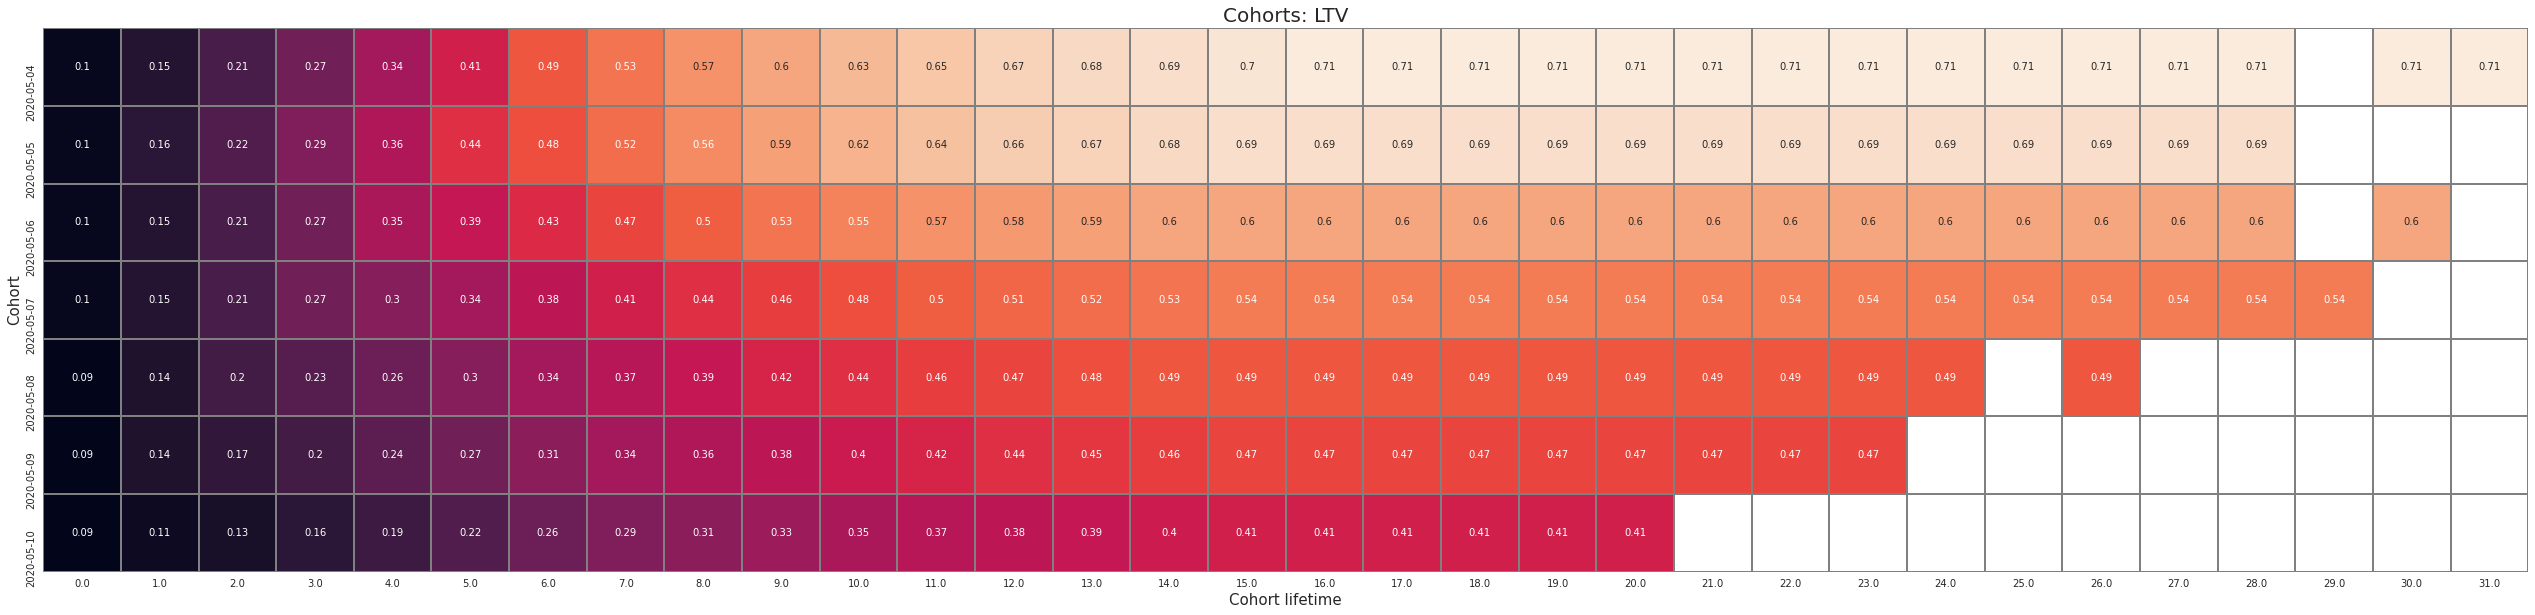

In [129]:
#визуализируем с помощью heatmap
plt.figure(figsize=(80, 10))
plt.title('Cohorts: LTV', size=20)
ax = sns.heatmap(output.cumsum(axis=1), annot=True, fmt='.2', linewidths=1, linecolor='gray', cbar=0, square=True)
plt.xlabel('Cohort lifetime', size=15)
plt.ylabel('Cohort', size=15)
plt.show()

Выводы по данному показателю:

* После 19-ого числа доходы с рекламы не растет и стабилен до конца лайфтайма
* С каждой когортой показатели все хуже
* Нужно искать причину, с чем может быть падение интереса пользователей - возможно это связано с багами, проблемами с интерфейсом или например, что первый уровень идет очень долго

<a class="anchor" id="30-bullet"></a>
### Общий вывод

В данной части были посчитаны следующие показатели:
* DAU -2884
* WAU - 6120 
* Sticky Factor - 47.14%
* CAC - среднее значение 0.57 у.е.

* Retention rate имеет высокие показатели на второй день, но ухудшается от когорты к когорте

* LTV - также ухудшается от когорты к когорте, нужно искать причину в чем может быть проблема потери интереса пользователей

## Анализ гипотез

В данном пункте, нам необходимо проверить две гипотезы - о равенстве средних между двумя группами по двум параметрам

<a class="anchor" id="31-bullet"></a>
### Гипотеза о различие среднего времени прохождения уровня между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над первым врагом

Сформируем нулевую и альтернатинвую гипотезу, а после этого сгруппируем данные в два датафрейма - в первом у нас будет люди, которые  закончили игру с помощью проекта,во втором с помощью победы над врагом.

После этого посчитаем дисперссию и p-value при знаичимсоти 0.5

<b>Нулевая гипотеза H0</b> - Среднее время прохождения уровня между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком, совпадает.

<b>Альтернативная гипотеза H1</b> - Среднее время прохождения уровня между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком, не совпадает.

In [130]:
user_filter_project=action[action['event'] == 'project']['user_id'] #отфильтруем по тем,кто сделал проект и получим список

In [131]:
action_fin_prj=action.query('user_id in @user_filter_project') # сделаем query

In [132]:
action_fin_prj_q=action_fin_prj.groupby('user_id').event_datetime.agg(['min', 'max']).reset_index()
# создадим датафрейм с минимальной и максимльной датой 

In [133]:
action_fin_prj_q['days']=(action_fin_prj_q['max']-action_fin_prj_q['min'])/ np.timedelta64(1, 'D')
#посчитаем разницу, перевеедем в дни

In [134]:
#отфильтруем по тем, кто закончил первый уровень, но не через проект
user_filter_win=action[(action['event'] == 'finished_stage_1') & (action['project_type']!='satellite_orbital_assembly')]['user_id']

In [135]:
#сделаему query
action_fin_winwin=action.query('(user_id in @user_filter_win) & (user_id not in @ user_filter_project)')

In [136]:
# создадим датафрейм с минимальной и максимльной датой 
action_fin_winwin_q=action_fin_winwin.groupby('user_id').event_datetime.agg(['min', 'max']).reset_index()

In [137]:
#посчитаем разницу, перевеедем в дни
action_fin_winwin_q['days']=(action_fin_winwin_q['max']-action_fin_winwin_q['min'])/ np.timedelta64(1, 'D')

Посчитаем значение дисперсий для двух выборок

In [138]:
print('Значение дисперсии для выборки "проект"',action_fin_prj_q['days'].var())

Значение дисперсии для выборки "проект" 12.303691104223093


In [139]:
print('Значение дисперсии для выборки "победа над первым врагом"',action_fin_winwin_q['days'].var())

Значение дисперсии для выборки "победа над первым врагом" 16.775309082387754


Проверим гипотезу на основе теста для двух средних из генеральной совокупности при alpha 0.05

In [140]:

results = st.ttest_ind(action_fin_prj_q['days'], action_fin_winwin_q['days'], equal_var = False)

#критический уровень статистической значимости

alpha = 0.05 

#для проверки используем критерий p-value

print('p-значение:', results.pvalue)

#сравним получившееся p-значение с заданным уровнем статистической значимости

if results.pvalue < alpha:
    print('Принимаем альтернативную гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 5.708058235070849e-107
Принимаем альтернативную гипотезу


Отвергаем нулевую гипотезу - статистически значмая разница между средним количеством времени, за которое пользователь проходит уровень - есть.

Теперь по аналогии проверим гипотезу о количестве зданий.

<a class="anchor" id="32-bullet"></a>
###  Гипотеза о различия среднего  количества зданий, построенных у пользователей, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над первым врагом

Датафреймы для выборки у нас уже были сформированы, поэтому cразу начнем анализ

<b>Нулевая гипотеза H0</b> - Среднее количество построенных зданий между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком, совпадает.

<b>Альтернативная гипотеза H1</b> - Среднее количество построенных зданий между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком, не совпадает.

In [141]:
buildings_per_user_pw.head()

,user_id,building_type
0,001d39dc-366c-4021-9604-6a3b9ff01e25,8
1,003ee7e8-6356-4286-a715-62f22a18d2a1,8
2,004074f8-251a-4776-922c-8348dca1a2f6,12
3,00464e5e-28ed-4be6-bf44-517ef7b3937b,8
4,0056c007-c082-43cc-bdef-afc49bca4cb9,3


In [142]:
buildings_per_user_p.head()

,user_id,building_type
0,006380d6-67a6-45de-ab1e-6eb54ad8dbe8,11
1,00be7371-fa79-4fbd-b8e7-8ba32e3f8f82,12
2,00c2b9f2-2615-439c-aed0-6974e4c6c1c1,11
3,00de2809-403e-4476-a2f7-ca1b11700190,13
4,00e83261-5fd4-4939-9616-802b5a0202c6,13


In [143]:
print('Значение дисперсии для выборки "проект"',buildings_per_user_pw['building_type'].var())

Значение дисперсии для выборки "проект" 9.360717395692165


In [144]:
print('Значение дисперсии для выборки "победа над первым врагом"',buildings_per_user_p['building_type'].var())

Значение дисперсии для выборки "победа над первым врагом" 4.676502331836245


In [145]:

results2 = st.ttest_ind(buildings_per_user_pw['building_type'], buildings_per_user_p['building_type'], equal_var = False)

#критический уровень статистической значимости

alpha = 0.05 

#для проверки используем критерий p-value

print('p-значение:', results2.pvalue)

#сравним получившееся p-значение с заданным уровнем статистической значимости

if results2.pvalue < alpha:
    print('Принимаем альтернативную гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.0
Принимаем альтернативную гипотезу


Отвергаем нулевую гипотезу - статистически значмая разница между средним количеством зданий, которое строит пользователь, в зависимости от группы - есть

<a class="anchor" id="33-bullet"></a>
### Общие выводы по части

В даннной части проекта мы протестировали две гипотезы о равенстве средних значений между двумя группами пользовтелей и нам удалось установить, что:
* в обоих случаях нулевая гипотеза была отвергнута - разница между средними значениями по количеству часов, за сколько пользователи проходят первый уровень, а также сколько зданий в среднем они строят в зависимости от их поведения в игре - есть.
* в целом, пользователи которые заканчивают игру с помощью проекта- тратят больше времени на прохождение уровня и строят больше зданий. Возможно, существует необходимость внести корректировки в игровую механику

## Вывод по проекту

<a class="anchor" id="34-bullet"></a>
### Общие выводы по проекту

<b><big>В данном проекте был сделано следующее:</big></b>
* были выгружены и обработаны данные
* были обработаны пропуски, дубликаты и формат данных
* был проведен исследовательский анализ данных
* были расчитаны метрики DAU, WAU , Sticky Factor, LTV, CAC, Retention Rate 
* были проверены две гипотезы о равенстве средних значений

<b><big>Результаты:</big></b>
* около 43 % пользователя оканчивают первый уровень, причем большинство выбирает способ победы над первым врагом
* большинство пользователей в игру нам приносит yandex.direct 
* пользователи в среднем проходят первый уровень за 12 дней, что возможно является весьма долгим показателем, который может оказывать свой эффект на LTV
* в среднем пользователя строят за игру около 10 домов
* в среднем пользователи заходят в игру 1.3 раз в день
* Sticky Factor на ровне 47.14%, что является очень хорошим показателем
* CAC в среднем состовляет 0.57 за одного пользователя (примим это во внимание, когда будет предлагать модель монетизации)
* Retention rate имеет высокие показатели на второй день, но ухудшается от когорты к когорте
* LTV - также ухудшается от когорты к когорте, нужно искать причину в чем может быть проблема потери интереса пользователей (пока кажется, что нужно сокртатить время прохождение первого уровня)
* различие между средними значениями пользователей которые заканчивают уровень с проектом и с теми, кто заканчивает с победой над врагом есть - как с точки зрения времени среднего прохождения уровня, так и с точки среднего количества построенных зданий




<a class="anchor" id="35-bullet"></a>
### Рекомендации для модели монетизации игры

Разработаем модель монетезации, на основе текущих условий.

Вводные:
* рекламное объявление показывается при строительстве здания 
* стоимость рекламного объявления - 0.07

Наша цель:
* снизить рекламную нагрузку на пользователя, чтобы они не уходили от нас из-за обилия рекламы
* выходить в прибыль (чтобы наш доход с рекламы не привышал затраты на нее)

Предложение:
* не показывать рекламу для каждого пользователя при строительстве первых n-зданий (точное количество проверим чуть позже) - чтобы пользователь больше вовлекался в игру и после этого рекламные интегрции воспринимались более сдержано
* перекрыть часть падение затрат (из-за отстувия рекламы при строительстве каждого здания) тем, что будем показывать дополнительный рекламный ролик тем пользователям, которые завершили уровень

Сгруппируем всех пользователей по user_id, количеству зданий и доходу, и напишем функцию, благодаря которой мы сможем тестировать насколько мы можем уменьшить количество показываемых роликов

In [146]:
buildings_per_user_mode = action.groupby('user_id').agg({'building_type': 'count','rev':'sum'}).reset_index()
buildings_per_user_mode

,user_id,building_type,rev
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,13,0.91
1,00151b4f-ba38-44a8-a650-d7cf130a0105,9,0.63
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,4,0.28
3,001d39dc-366c-4021-9604-6a3b9ff01e25,9,0.56
4,002f508f-67b6-479f-814b-b05f00d4e995,12,0.84
...,...,...,...
13571,ffef4fed-164c-40e1-bde1-3980f76d0fb5,10,0.63
13572,fffab3da-da0e-4e30-ae62-10d0a2e24a4e,16,1.12
13573,fffb626c-5ab6-47c9-8113-2062a2f18494,10,0.63
13574,ffff194a-56b7-4c12-860d-3485242ae7f5,7,0.49


In [147]:
#n-количество уменьшаемых рекламных показов,rate - стоимость рекламы, users - количество пользователей, кто завершил уровень
# exp-расходы на закупку рекламы, win_ad- сколько мы получим при показе рекламы на этапе завершения уровня
def model_income (data,n,rate,users,exp): 
    data['new_build']=data['building_type']-n 
    data['new_build']= np.maximum(data['building_type'] - n,0)
    data['new_rev']=data['new_build']*rate
    win_ad=rate*users
    return (data['new_rev'].sum()+win_ad)-exp
    

In [148]:
users=len(action.query('event=="finished_stage_1"')) #количество тех, кто завершил первый уровень
users

5817

In [149]:
costs=ch_gr['cost'].sum() #траты на рекламу
costs

7603.576986788023

In [156]:
model_income(buildings_per_user_mode,10,0.07,users,costs)   #тест

-5553.836986788023

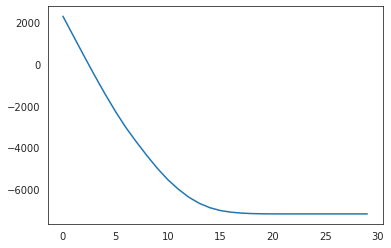

In [152]:
# Код ревьюера
rev_x = [i for i in range(30)]
rev_y = [model_income(buildings_per_user_mode,i,0.07,users,costs) for i in rev_x]

plt.plot(rev_x, rev_y)
del rev_x
del rev_y

Для того, чтоб протестить модель, вызовем дополнительне переменные - расходы на рекламу и сколько игроков закончило 1 уровень

Теперь сделаем тесты модели, уменьшая количество показов для каждого пользователя на 1, пока наши коммулятивные расходы не станут минусовыми.

In [153]:
model_income(buildings_per_user_mode,1,0.07,users,costs)

1348.0230132119777

In [154]:
model_income(buildings_per_user_mode,2,0.07,users,costs)

401.6930132119778

In [155]:
model_income(buildings_per_user_mode,3,0.07,users,costs)

-528.6069867880233

<b><big>Выводы по модели</big></b>

В результате теста модели, мы выяснили, что без выхода в минус мы можем сократить рекламную нагрузку во время строительства зданий на 2 рекламных ролика для каждого пользователя (предпочитетельно на первые два строительтва зданий), если при это добавим 1 дополнительный ролик на экране завершения уровня.


Мы можем передать заказчику эту модель, так как он, если что, мог "использовать" свои цифры и посчитать возможную доходность

Также дополнительно нужно проанализировать затраты на рекламу - эффективно ли расходуется бюджет. Возможно, какой-то канал является слишком дорогим и малоэффективным и затраты можно перераспределить